In [1]:
%matplotlib inline
import numpy as np 
import matplotlib.pyplot  as plt
from sklearn.metrics import r2_score

In [2]:
X = np.linspace(0,20)
a=-2
b=1
y = a*X+b

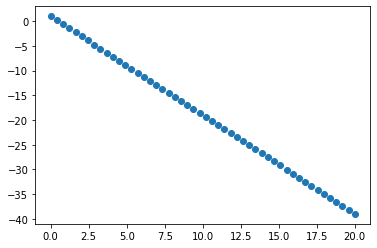

In [4]:
#relation between X and y is linear even if X values are random
plt.scatter(X,y)

In [15]:
def adagrad(X,y,learning_rate,n,epsilon,theta0,theta1):
    m = len(X)
    listoftheta0 = []
    listoftheta1 = []
    listofcost = []
    listofhypo = np.zeros([len(X),n])
    theta0=0
    theta1=0
    v0=0
    v1=0
    for i in range(n):
        h = theta0 + theta1*X
        listofhypo[:,i]=h
        j = 1/(2*m) *sum((h-y)**2)
        listofcost.append(j)
        grad0 = 1/m * sum(h-y)
        grad1 = 1/m * sum((h-y)*X)
        v0 =v0+grad0**2
        v1 = v1+grad1**2
        theta0 = theta0 - learning_rate * grad0/(np.sqrt(v0)+ epsilon)
        listoftheta0.append(theta0)
        theta1 = theta1 - learning_rate * grad1/(np.sqrt(v1)+ epsilon)
        listoftheta1.append(theta1)
    return (listoftheta0,listoftheta1,listofcost,listofhypo,theta0,theta1,h,j)

In [16]:
listoftheta0,listoftheta1,listofcost,listofhypo,theta1,theta0,h,j =adagrad(X,y,0.05,10000,0.0001,0,0)


In [17]:
r2_score(h, y)

0.995561087546048

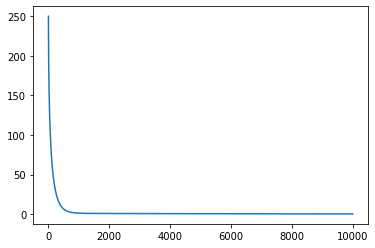

In [20]:
plt.plot(range(10000),listofcost)
plt.show()

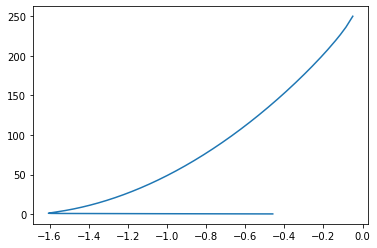

In [21]:
plt.plot(listoftheta0,listofcost)
plt.show()

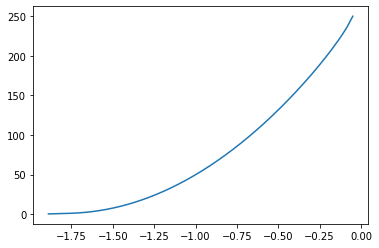

In [22]:
plt.plot(listoftheta1,listofcost)
plt.show()

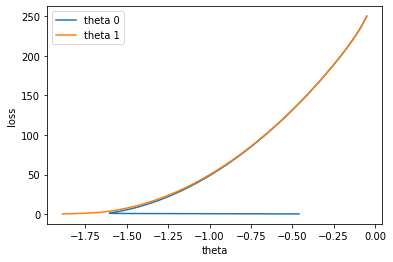

In [34]:
plt.plot(listoftheta0,listofcost,label="theta 0")
# theta1 vs loss
plt.plot(listoftheta1,listofcost, label="theta 1")
plt.xlabel("theta")
plt.ylabel("loss")
plt.legend()

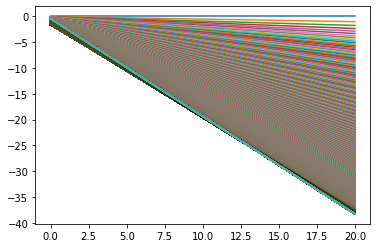

In [39]:
_ = plt.plot(X,listofhypo)
plt.show()

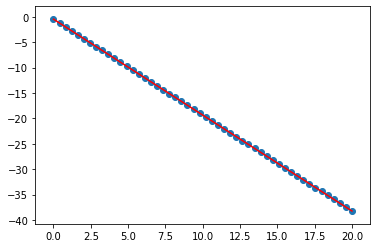

In [43]:
_=plt.plot(X,h,'r')
_ = plt.scatter(X,h)
plt.show()

## RMSprop 

In [44]:
def rms_prop(X,y,learning_rate,n,epsilon,beta,theta0,theta1):
    m = len(X)
    listoftheta0 = []
    listoftheta1 = []
    listofcost = []
    listofhypo = np.zeros([len(X),n])
    theta0=0
    theta1=0
    v0=0
    v1=0
    for i in range(n):
        h = theta0 + theta1*X
        listofhypo[:,i]=h
        j = 1/(2*m) *sum((h-y)**2)
        listofcost.append(j)
        grad0 = 1/m * sum(h-y)
        grad1 = 1/m * sum((h-y)*X)
        v0 = beta * v0 + (1-beta)*(grad0**2)
        v1 = beta * v1 + (1-beta)*(grad1**2)
        theta0 = theta0 - learning_rate * grad0/(np.sqrt(v0)+ epsilon)
        listoftheta0.append(theta0)
        theta1 = theta1 - learning_rate * grad1/(np.sqrt(v1)+ epsilon)
        listoftheta1.append(theta1)
    return (listoftheta0,listoftheta1,listofcost,listofhypo,theta0,theta1,h,j)

In [45]:
listoftheta0_1,listoftheta1_1,listofcost1,listofhypo1,theta1_1,theta0_1,h1,j1 =rms_prop(X,y,0.05,100,0.0001,0.03,0,0)


In [46]:
h1

array([ 1.63123972e-02, -7.78778841e-01, -1.57387008e+00, -2.36896132e+00,
       -3.16405255e+00, -3.95914379e+00, -4.75423503e+00, -5.54932627e+00,
       -6.34441751e+00, -7.13950875e+00, -7.93459998e+00, -8.72969122e+00,
       -9.52478246e+00, -1.03198737e+01, -1.11149649e+01, -1.19100562e+01,
       -1.27051474e+01, -1.35002386e+01, -1.42953299e+01, -1.50904211e+01,
       -1.58855124e+01, -1.66806036e+01, -1.74756948e+01, -1.82707861e+01,
       -1.90658773e+01, -1.98609686e+01, -2.06560598e+01, -2.14511510e+01,
       -2.22462423e+01, -2.30413335e+01, -2.38364247e+01, -2.46315160e+01,
       -2.54266072e+01, -2.62216985e+01, -2.70167897e+01, -2.78118809e+01,
       -2.86069722e+01, -2.94020634e+01, -3.01971546e+01, -3.09922459e+01,
       -3.17873371e+01, -3.25824284e+01, -3.33775196e+01, -3.41726108e+01,
       -3.49677021e+01, -3.57627933e+01, -3.65578846e+01, -3.73529758e+01,
       -3.81480670e+01, -3.89431583e+01])

In [47]:
r2_score(h1, y)

0.9976553745108717

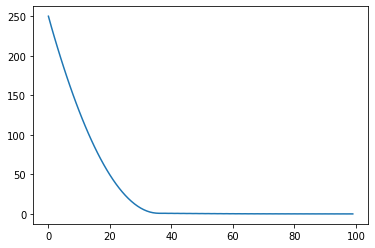

In [48]:
plt.plot(range(100),listofcost1)
plt.show()

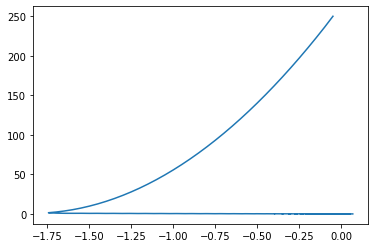

In [49]:
plt.plot(listoftheta0_1,listofcost1)
plt.show()

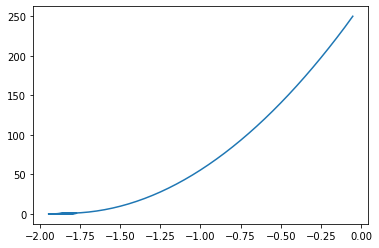

In [50]:
plt.plot(listoftheta1_1,listofcost1)
plt.show()

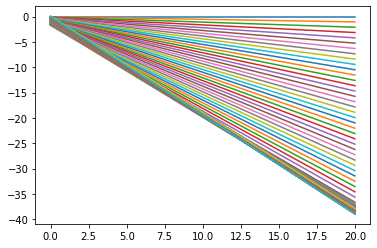

In [51]:
_ = plt.plot(X,listofhypo1)
plt.show()

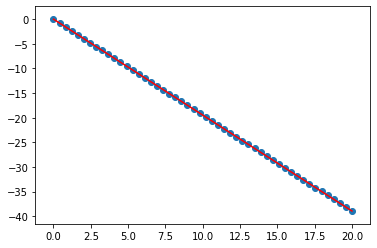

In [52]:
_=plt.plot(X,h1,'r')
_ = plt.scatter(X,h1)
plt.show()

## Adam 

In [53]:
def adam(X,y,learning_rate,n,epsilon,beta1,beta2,theta0,theta1):
    m = len(X)
    listoftheta0 = []
    listoftheta1 = []
    listofcost = []
    listofhypo = np.zeros([len(X),n])
    theta0=0
    theta1=0
    v0=0
    v1=0
    moment0=0
    moment1=0
    for i in range(n):
        h = theta0 + theta1*X
        listofhypo[:,i]=h
        j = 1/(2*m) *sum((h-y)**2)
        listofcost.append(j)
        grad0 = 1/m * sum(h-y)
        grad1 = 1/m * sum((h-y)*X)
        moment0 = beta1*moment0+(1-beta1)*grad0
        moment1 = beta1*moment1+(1-beta1)*grad1
        v0 = beta2 *v0+(1-beta2)*(grad0**2)
        v1 = beta2 *v1+(1-beta2)*(grad1**2)
        theta0 = theta0 - (learning_rate * moment0)/(np.sqrt(v0)+ epsilon)
        listoftheta0.append(theta0)
        theta1 = theta1 - (learning_rate * moment1)/(np.sqrt(v1)+ epsilon)
        listoftheta1.append(theta1)
    return (listoftheta0,listoftheta1,listofcost,listofhypo,theta0,theta1,h,j)

In [70]:
listoftheta0_2,listoftheta1_2,listofcost2,listofhypo2,theta1_2,theta0_2,h2,j2 =adam(X,y,0.01,1000,0.001,0.001,0.001,0,0)


In [71]:
h2

array([  0.85971036,   0.0502635 ,  -0.75918337,  -1.56863023,
        -2.3780771 ,  -3.18752396,  -3.99697083,  -4.80641769,
        -5.61586455,  -6.42531142,  -7.23475828,  -8.04420515,
        -8.85365201,  -9.66309888, -10.47254574, -11.28199261,
       -12.09143947, -12.90088634, -13.7103332 , -14.51978007,
       -15.32922693, -16.1386738 , -16.94812066, -17.75756753,
       -18.56701439, -19.37646126, -20.18590812, -20.99535498,
       -21.80480185, -22.61424871, -23.42369558, -24.23314244,
       -25.04258931, -25.85203617, -26.66148304, -27.4709299 ,
       -28.28037677, -29.08982363, -29.8992705 , -30.70871736,
       -31.51816423, -32.32761109, -33.13705796, -33.94650482,
       -34.75595168, -35.56539855, -36.37484541, -37.18429228,
       -37.99373914, -38.80318601])

In [72]:
r2_score(h2, y)

0.999921909325008

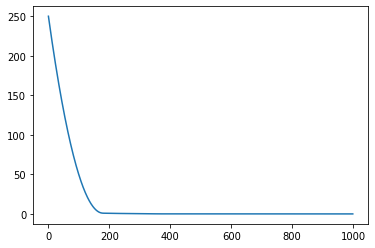

In [73]:
plt.plot(range(1000),listofcost2)
plt.show()

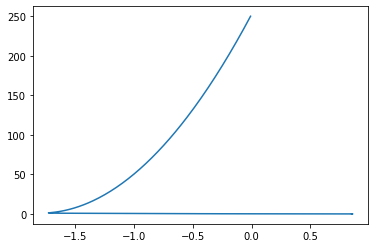

In [74]:
plt.plot(listoftheta0_2,listofcost2)
plt.show()

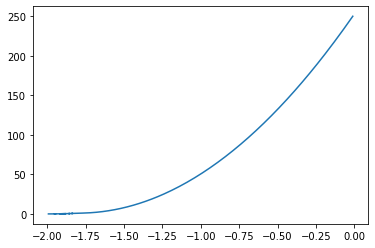

In [75]:
plt.plot(listoftheta1_2,listofcost2)
plt.show()

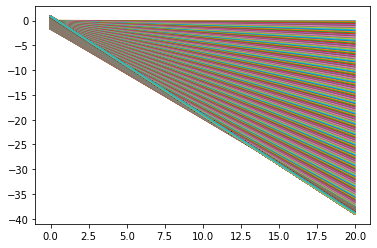

In [76]:
_ = plt.plot(X,listofhypo2)
plt.show()

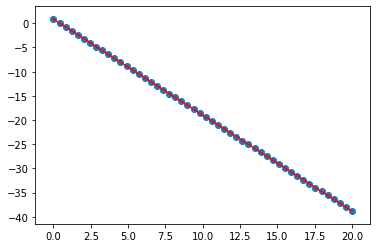

In [77]:
_=plt.plot(X,h2,'r')
_ = plt.scatter(X,h2)
plt.show()